In [ ]:
# importing the data
# active cases--> 10 -2 -1 ---> 7(active cases)
# plots
# confirmed
# recovered
# death

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# get howor with details while moving cursor on graph -- below lib help for that
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
#parse_dates=['Date'] convert object format date into datetime64[ns] format

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8432 non-null   object        
 1   Country/Region  19220 non-null  object        
 2   Lat             19220 non-null  float64       
 3   Long            19220 non-null  float64       
 4   Date            19220 non-null  datetime64[ns]
 5   Confirmed       19219 non-null  float64       
 6   Deaths          19219 non-null  float64       
 7   Recovered       19219 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB


In [5]:
df.rename(columns = {'Date':'date',
                    'Province/State':'state',
                    'Country/Region':'country',
                    'Lat':'lat',
                    'Long':'long',
                    'Confirmed':'confirmed',
                    'Deaths':'deaths',
                    'Recovered':'recovered'},
         inplace=True)
# inplace=True  changing in orignal dataset itself

In [6]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [7]:
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [8]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [9]:
df['date'].min()

Timestamp('2020-01-22 00:00:00')

In [10]:
df['country'].value_counts()

US               3596
China            2046
Canada            744
Australia         558
France            558
                 ... 
Ukraine            62
Hungary            62
Liechtenstein      62
Poland             62
The Gambia         62
Name: country, Length: 183, dtype: int64

In [11]:
# latest / top / current date cases country wise
top=df[df['date']==df['date'].max()]
world=top.groupby('country')['confirmed','active','deaths','recovered'].sum().reset_index()
world.head()

,country,confirmed,active,deaths,recovered
0,Afghanistan,40.0,38.0,1.0,1.0
1,Albania,89.0,85.0,2.0,2.0
2,Algeria,201.0,119.0,17.0,65.0
3,Andorra,113.0,111.0,1.0,1.0
4,Angola,2.0,2.0,0.0,0.0


In [12]:
world['country'].value_counts()

Afghanistan    1
Morocco        1
Namibia        1
Nepal          1
Netherlands    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: country, Length: 183, dtype: int64

In [13]:
top.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
18910,NaN,Thailand,15.0000,101.0000,2020-03-23,599.0,1.0,44.0,554.0
18911,NaN,Japan,36.0000,138.0000,2020-03-23,1086.0,40.0,235.0,811.0
18912,NaN,Singapore,1.2833,103.8333,2020-03-23,455.0,2.0,144.0,309.0
18913,NaN,Nepal,28.1667,84.2500,2020-03-23,2.0,0.0,1.0,1.0
18914,NaN,Malaysia,2.5000,112.5000,2020-03-23,1306.0,10.0,139.0,1157.0


In [14]:
top['country'].value_counts()

US               58
China            33
Canada           12
Australia         9
France            9
                 ..
Ukraine           1
Hungary           1
Liechtenstein     1
Poland            1
The Gambia        1
Name: country, Length: 183, dtype: int64

In [15]:
figure= px.choropleth(world,locations='country',
                     locationmode='country names', color='active',
                     hover_name='country',range_color=[1,1000],
                     color_continuous_scale='ice',
                     title='countries with active cases')
figure.show()

In [16]:
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


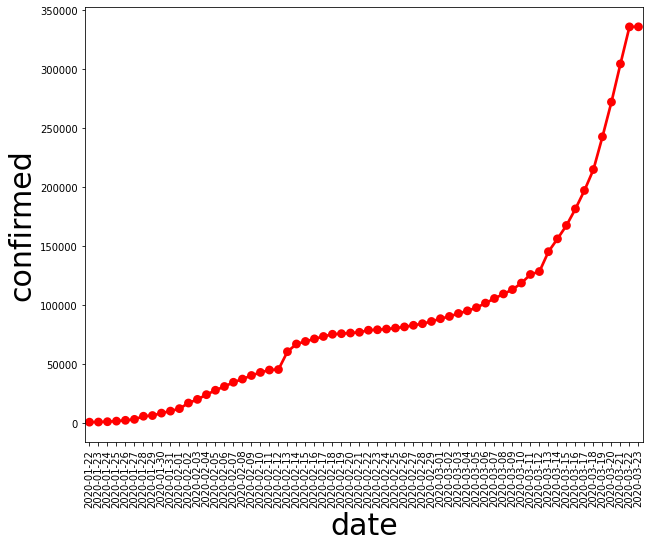

In [17]:
plt.figure(figsize=(10,8))
plt.xlabel('dates',fontsize=30)
plt.ylabel('total cases',fontsize=30)
plt.xticks(rotation=90,fontsize=10)

sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color='red')

In [18]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [19]:
china=df[df.country=='China']
china=china.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()

In [20]:
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28.0,17.0,548.0,503.0
1,2020-01-23,30.0,18.0,643.0,595.0
2,2020-01-24,36.0,26.0,920.0,858.0
3,2020-01-25,39.0,42.0,1406.0,1325.0
4,2020-01-26,49.0,56.0,2075.0,1970.0


In [21]:
us=df[df.country=='US']
us=us.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()
us=us.iloc[33:].reset_index().drop('index',axis=1)
us.head()

,date,recovered,deaths,confirmed,active
0,2020-02-24,0.0,0.0,36.0,36.0
1,2020-02-25,0.0,0.0,36.0,36.0
2,2020-02-26,0.0,0.0,42.0,42.0
3,2020-02-27,0.0,0.0,42.0,42.0
4,2020-02-28,0.0,0.0,44.0,44.0


In [22]:
us=df[(df['country']=='US')|((df['confirmed'])!=0)|((df['deaths'])!=0)|((df['recovered'])!=0)]
us.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
98,Washington,US,47.4009,-121.4905,2020-01-22,0.0,0.0,0.0,0.0
99,New York,US,42.1657,-74.9481,2020-01-22,0.0,0.0,0.0,0.0
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0


In [23]:
italy=df[df.country=='Italy']
italy=italy.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop('index',axis=1)
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0


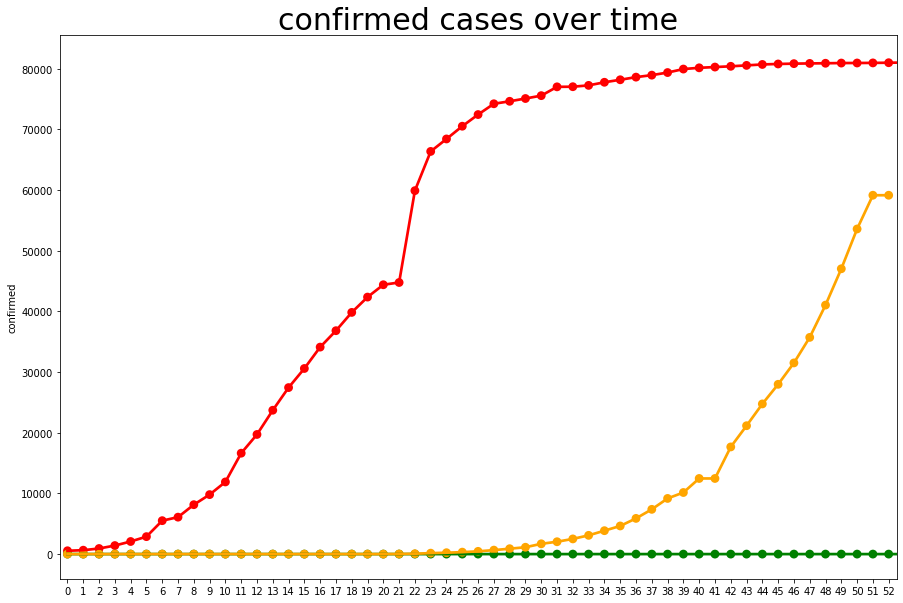

In [24]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.confirmed,color='red')
sns.pointplot(us.index,us.confirmed,color='green')
sns.pointplot(italy.index,italy.confirmed,color='orange')
plt.title('confirmed cases over time',fontsize=30)
plt.show()

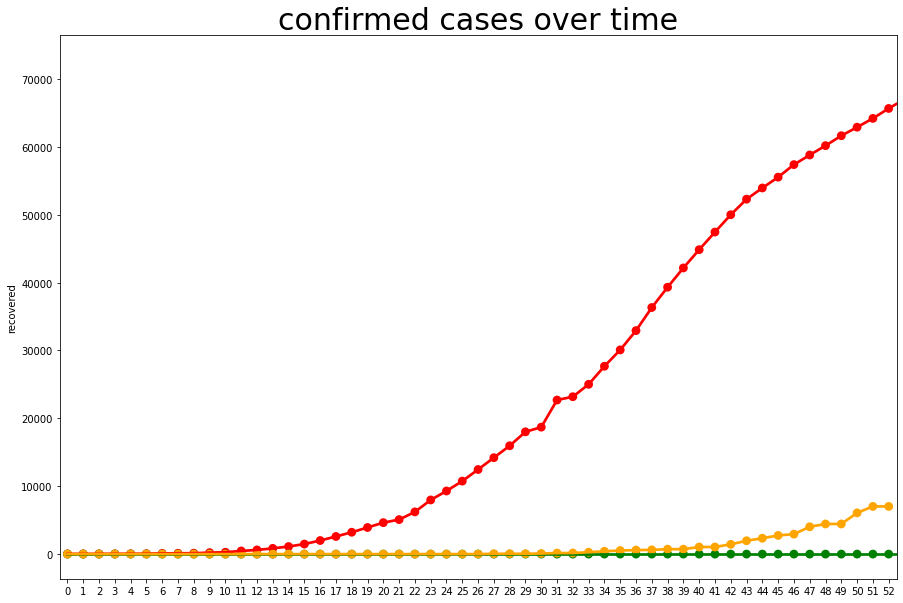

In [25]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.recovered,color='red')
sns.pointplot(us.index,us.recovered,color='green')
sns.pointplot(italy.index,italy.recovered,color='orange')
plt.title('confirmed cases over time',fontsize=30)
plt.show()

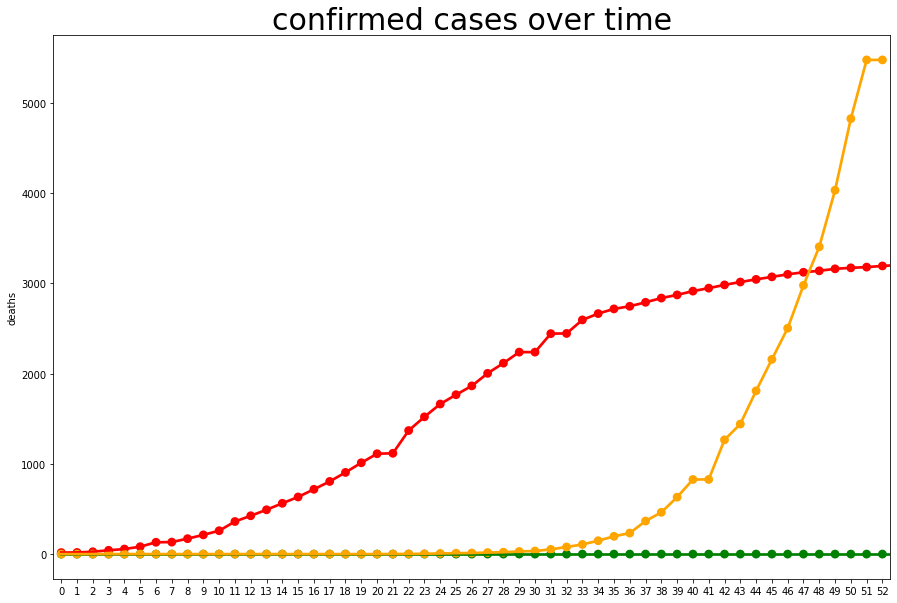

In [26]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.deaths,color='red')
sns.pointplot(us.index,us.deaths,color='green')
sns.pointplot(italy.index,italy.deaths,color='orange')
plt.title('confirmed cases over time',fontsize=30)
plt.show()

-------------------------------------------------------

In [27]:
df_india=pd.read_excel('covid_19_india.xlsx')
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [28]:
df_india['total cases']=df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [29]:
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33


In [30]:
df_india['total active']=df_india['total cases']-(df_india['Cured']+df_india['Death'])

In [31]:
total_active=df_india['total active'].sum()
top_cases=df_india.groupby('Name of State / UT')['total active'].sum().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='crest')

,total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


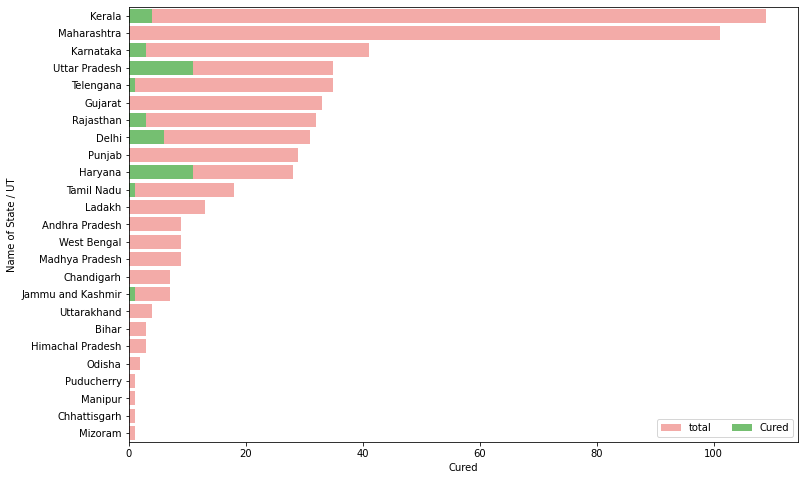

In [32]:
a,ax=plt.subplots(figsize=(12,8))
data=df_india[['Name of State / UT','total cases', 'Cured','Death']]
data.sort_values('total cases',ascending=False,inplace=True)


sns.set_color_codes('pastel')
sns.barplot(x='total cases',y= 'Name of State / UT', data=data,label='total',color='r')

sns.set_color_codes('muted')
sns.barplot(x='Cured',y='Name of State / UT',data=data,label='Cured',color='g')

ax.legend(ncol=2,loc='best',frameon=True)


In [33]:
db_india=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')

In [34]:
db_india.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [35]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=db_india['Date'],y=db_india['Total Cases'],mode='lines+markers',name='Total Cases'))

In [36]:
fig=px.bar(db_india,x='Date',y='New Cases',barmode='relative')
fig.show()

In [37]:
df_confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered=pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths=pd.read_csv('time_series_covid19_deaths_global.csv')

In [38]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [39]:
df_confirmed.rename(columns={'Country/Region':'country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'country'},inplace=True)

In [40]:
df_confirmed.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [41]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [42]:
confirmed=df.groupby('date').sum()['confirmed'].reset_index()
deaths=df.groupby('date').sum()['deaths'].reset_index()
recovered=df.groupby('date').sum()['recovered'].reset_index()

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'],y=confirmed['confirmed'],mode='lines+markers',name='Total Confirmed Cases'))
fig.add_trace(go.Scatter(x=deaths['date'],y=deaths['deaths'],mode='lines+markers',name='Total Confirmed Cases'))
fig.add_trace(go.Scatter(x=recovered['date'],y=recovered['recovered'],mode='lines+markers',name='Total Confirmed Cases'))


In [ ]:
#time series

In [44]:
! pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from prophet import Prophet

In [46]:
# confirmed,deaths n recovered 

In [47]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [48]:
confirmed.head()

,ds,y
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [49]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [50]:
m=Prophet()

In [51]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfp7jcw3/rhcl0muw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfp7jcw3/ank5mbx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76771', 'data', 'file=/tmp/tmpqfp7jcw3/rhcl0muw.json', 'init=/tmp/tmpqfp7jcw3/ank5mbx9.json', 'output', 'file=/tmp/tmpqfp7jcw3/prophet_modelk4i9ivo_/prophet_model-20230202131651.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [52]:
future=m.make_future_dataframe(periods=7)

In [53]:
future.tail()

,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [54]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.950106,342136.555102,368438.522707
65,2020-03-27,372235.404791,358813.108246,385627.368412
66,2020-03-28,388675.044310,375200.152298,402514.388479
67,2020-03-29,405308.041151,391486.094750,419326.210629
68,2020-03-30,418529.738841,403719.899224,434052.493690


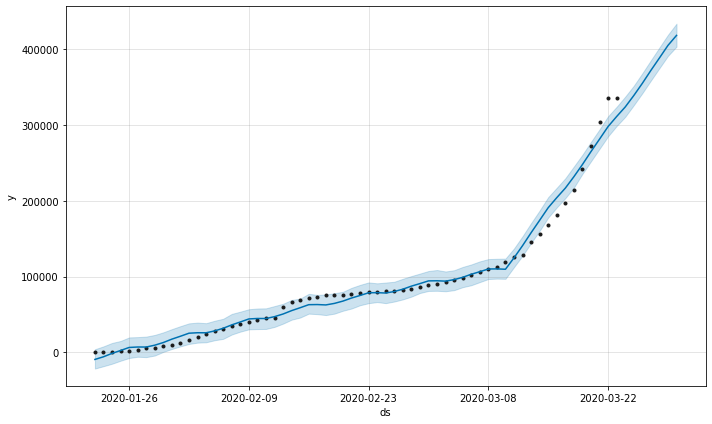

In [55]:
confirmed_forecast_plot=m.plot(forecast)